# Plastic activity

In this jupyternotebook we are going to detect T1 events between each individual bubble in a set of images.

## A) Import libraries

In [1]:
from FoamQuant import *
import numpy as np
import skimage as ski 
import os
import matplotlib.pyplot as plt; plt.rc('font', size=20) 
from tifffile import imread
from scipy import ndimage
import pickle as pkl
import pandas as pd

## B) Quantification folders

In [2]:
# Quantification folders names
Quant_Folder = ['Q3_Bubble_Prop','Q7_Tracking','Q8_Ctc','Q9_TransCtc','Q10_LostNewCtc','Q11_T1']

# Create the quantification folders (where we are going to save our results)
for Pi in Quant_Folder:
    if  os.path.exists(Pi):
        print('path already exist:',Pi)
    else:
        print('Created folder:',Pi)
        os.mkdir(Pi)

path already exist: Q3_Bubble_Prop
path already exist: Q7_Tracking
path already exist: Q8_Ctc
path already exist: Q9_TransCtc
path already exist: Q10_LostNewCtc
path already exist: Q11_T1


## C) Get familiar with the input data
Let's read the first bubble-segmented image of the series (with no bubble on the edges). 

/gpfs/offline1/staff/tomograms/users/flosch/Rheometer_Jupyter/Jupy_FoamQuant/FoamQuant/Figure.py:90: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


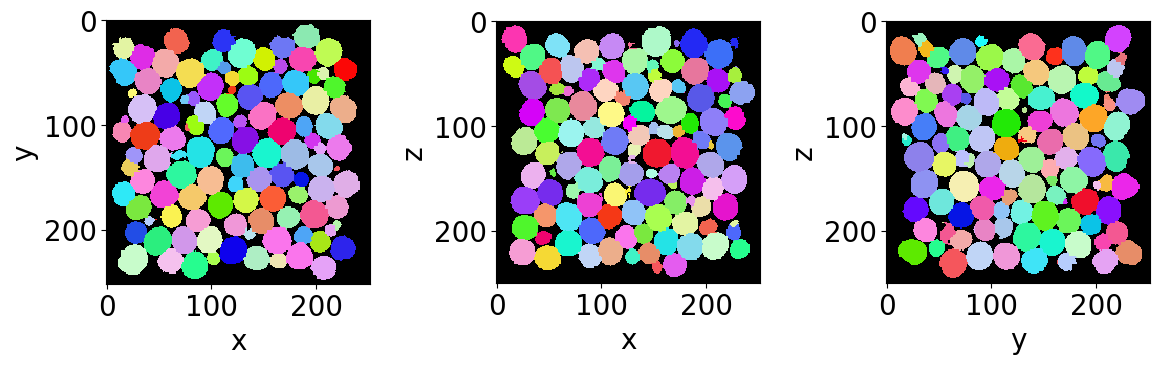

In [3]:
# Name and directory of  the no-edge bubble segmented images
dirnoedge = 'P5_BubbleNoEdge/'
namenoedge = 'BubbleNoEdge_'

# Read the first image of the series
Lab = imread(dirnoedge+namenoedge+strindex(1, 3)+'.tiff')

# Since we are now looking at more bubbles let's create a "larger" random colormap: here 500 random colors
rcmap = RandomCmap(500, verbose=False)

# Show a 3D-cut view of the volume
Cut3D(Lab,  
      nameaxes=['z','y','x'],
      cmap=rcmap, 
      interpolation='nearest', 
      figblocksize=4)

## B) Bubble tracking
The first step when tracking the bubbles is to extract their region properties. We are going to base our tracking on the centroid and the volume of them at consecutive time steps. 

In [4]:
# Name and directory where we are going to save the bubble region properties
dir_Bubble_prop = 'Q3_Bubble_Prop/'
name_Bubble_prop = 'Bubble_Prop_'

# Indexes of the images of our time-series (we are working here with 10 subsequent images of the same foam sample, evolving over time).
imrange = [1,2,3,4,5,6,7,8,9,10]

RegionProp_Batch(namenoedge,
                 name_Bubble_prop,
                 dirnoedge,
                 dir_Bubble_prop,
                 imrange,
                 verbose=True,
                 endread='.tiff',
                 endsave='.tsv')

Path exist: True
Bubble_Prop_001: done
Bubble_Prop_002: done
Bubble_Prop_003: done
Bubble_Prop_004: done
Bubble_Prop_005: done
Bubble_Prop_006: done
Bubble_Prop_007: done
Bubble_Prop_008: done
Bubble_Prop_009: done
Bubble_Prop_010: done


Now that we have the bubble region properties, we can use **LabelTracking_Batch** to track the bubble labels between two subsequent time steps. The tracking finds the closest centroid of the bubbles in the next image. There is in addition a volume continuity criteria that allows to disregard over- or undersegmented labels. In addition, the result from discrete digital correlation can be feed-in for helping this simple tracking algorithm (not shown in this example).

In [5]:
# Read/Save image names and directories
dirTrack = 'Q7_Tracking/'
nameTrack = 'Tracking'

# Tracking
LabelTracking_Batch(name_Bubble_prop, 
                    nameTrack, 
                    dir_Bubble_prop, 
                    dirTrack,
                    imrange,
                    verbose=False,
                    endread='.tsv',
                    endsave='.tsv',
                    n0=3,
                    searchbox=[-5,5,-5,5,-5,5],   # The size of the searching box
                    Volpercent=0.05)                    # The volume continuity percentage criteria

Path exist: True


100%|██████████| 941/941 [00:00<00:00, 1092.68it/s]


Lost tracking: 87 9.24548352816153 %


100%|██████████| 938/938 [00:00<00:00, 1205.00it/s]


Lost tracking: 46 4.904051172707889 %


100%|██████████| 942/942 [00:00<00:00, 1204.13it/s]


Lost tracking: 52 5.520169851380043 %


100%|██████████| 943/943 [00:00<00:00, 1189.92it/s]


Lost tracking: 49 5.1961823966065745 %


100%|██████████| 956/956 [00:00<00:00, 1219.21it/s]


Lost tracking: 46 4.811715481171548 %


100%|██████████| 945/945 [00:00<00:00, 1226.19it/s]


Lost tracking: 36 3.8095238095238098 %


100%|██████████| 941/941 [00:00<00:00, 1213.82it/s]


Lost tracking: 16 1.7003188097768331 %


100%|██████████| 950/950 [00:00<00:00, 1217.91it/s]


Lost tracking: 36 3.7894736842105265 %


100%|██████████| 948/948 [00:00<00:00, 1146.08it/s]

Lost tracking: 29 3.059071729957806 %


Let's open the first tracking table with **pandas**. It contains information about the tracked bubbles at the first time step ('lab1', 'z1', 'y1', 'x1', 'sph1', 'vol1', ...) and similarly to the associated bubble at the next time step ('lab2', 'z2', 'y2', 'x2', 'sph2', 'vol2', ...). It also include the displacement values from centroid to centroid ('dz','dy','dx').

In [6]:
df = pd.read_csv(dirTrack+nameTrack+strindex(2,n0=3)+'_'+strindex(3,n0=3)+'.tsv',sep = '\t')
display(df)

,lab1,lab2,z1,z2,y1,y2,x1,x2,dz,dy,...,sph1,sph2,volfit1,volfit2,U1,U2,type1,type2,Utype1,Utype2
0,1,6,15.152388,16.355922,40.837356,40.909404,84.303429,84.439846,1.203534,0.072047,...,0.999199,0.999447,9722.445004,9655.570359,0.067219,0.055917,-1,-1,-0.067219,-0.055917
1,2,8,14.948635,16.062156,114.038778,114.125025,131.859405,131.406562,1.113521,0.086248,...,0.998073,0.996529,9916.218343,10617.816823,0.104464,0.138796,-1,1,-0.104464,0.138796
2,3,10,15.792518,16.575670,199.692792,200.062097,164.094434,163.655742,0.783151,0.369305,...,0.997768,0.998202,11081.698240,9876.018743,0.113067,0.101176,-1,-1,-0.113067,-0.101176
3,4,12,16.552135,17.140166,32.360536,32.686041,222.787112,222.540675,0.588032,0.325505,...,0.997244,0.997527,8860.030219,9407.564214,0.125878,0.119138,-1,-1,-0.125878,-0.119138
4,5,13,16.357539,16.800449,79.266306,79.635258,184.244521,183.931281,0.442910,0.368953,...,0.997967,0.997527,7657.430390,9407.564214,0.106439,0.119138,1,-1,0.106439,-0.119138
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
933,934,942,232.246336,235.004107,172.522232,171.639124,62.928439,65.383649,2.757771,-0.883108,...,0.998049,0.995721,8158.558661,10552.541454,0.104122,0.155107,1,1,0.104122,0.155107
934,935,-1,232.539655,-1.000000,231.835212,-1.000000,27.378915,-1.000000,-233.539655,-232.835212,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1,-1,1.000000,1.000000
935,936,-1,233.218080,-1.000000,49.249668,-1.000000,71.733827,-1.000000,-234.218080,-50.249668,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1,-1,1.000000,1.000000
936,937,939,232.973806,233.805951,130.775228,132.122098,169.414120,169.746056,0.832145,1.346871,...,0.999508,0.998356,8053.805679,9853.325291,0.052833,0.095723,-1,1,-0.052833,0.095723


## D) Contact pairs

In [7]:
# Name and directory where we are going to save the contact pairs ctc = (lab_bbl_i, lab_bbl_j)
dirbubbleseg = 'P4_BubbleSegmented/'
namebubbleseg = 'BubbleSeg_'

dirnoedge = 'P5_BubbleNoEdge/'
namenoedge = 'BubbleNoEdge_'

dir_Ctc = 'Q8_Ctc/'
name_Ctc = 'Ctc_'

GetContacts_Batch(namebubbleseg,
                  namenoedge,
                  name_Ctc,
                  dirbubbleseg,
                  dirnoedge,
                  dir_Ctc,
                  imrange,
                  verbose=True,
                  endread='.tiff',
                  endread_noedge='.tiff',
                  endsave='.tiff',
                  n0=3,
                  save='pair', # <- save the contact pairs
                  maximumCoordinationNumber=20)

Path exist: True
Ctc_001: done
Ctc_002: done
Ctc_003: done
Ctc_004: done
Ctc_005: done
Ctc_006: done
Ctc_007: done
Ctc_008: done
Ctc_009: done
Ctc_010: done


## E) Translate contact pairs

In [8]:
# Name and directory where we are going to save the translated contact pairs
dir_TransCtc = 'Q9_TransCtc/'
name_TransCtc = 'TransCtc_'

Translate_Pairs_Batch(name_Ctc+'pair_', 
                      name_TransCtc, 
                      nameTrack, 
                      dirTrack, 
                      dir_Ctc, 
                      dir_TransCtc, 
                      imrange, 
                      endsave='.tsv', 
                      n0=3)

Tracking001_002 : done
Ctc_pair_002: done


100%|██████████| 4789/4789 [00:01<00:00, 4315.20it/s] 


Tracking002_003 : done
Ctc_pair_003: done


100%|██████████| 4797/4797 [00:01<00:00, 4415.46it/s] 


Tracking003_004 : done
Ctc_pair_004: done


100%|██████████| 4795/4795 [00:01<00:00, 4387.81it/s] 


Tracking004_005 : done
Ctc_pair_005: done


100%|██████████| 4895/4895 [00:01<00:00, 4362.13it/s] 


Tracking005_006 : done
Ctc_pair_006: done


100%|██████████| 4845/4845 [00:01<00:00, 4328.30it/s] 


Tracking006_007 : done
Ctc_pair_007: done


100%|██████████| 4843/4843 [00:01<00:00, 4405.62it/s] 


Tracking007_008 : done
Ctc_pair_008: done


100%|██████████| 4872/4872 [00:01<00:00, 4434.31it/s] 


Tracking008_009 : done
Ctc_pair_009: done


100%|██████████| 4879/4879 [00:01<00:00, 4394.15it/s] 


Tracking009_010 : done
Ctc_pair_010: done


100%|██████████| 4841/4841 [00:01<00:00, 4441.16it/s] 


## F) Detect lost and new contacts

In [9]:
# Name and directory where we are going to save the translated contact pairs
dir_LostNewCtc = 'Q10_LostNewCtc/'
name_LostCtc = 'LostCtc_'
name_NewCtc = 'NewCtc_'

LostNewContact_Batch([dir_Ctc,name_Ctc+'pair_'], 
                     [dir_TransCtc,name_TransCtc], 
                     [dir_LostNewCtc,name_LostCtc], 
                     [dir_Bubble_prop,name_Bubble_prop], 
                     [dir_LostNewCtc,name_NewCtc],
                     imrange, 
                     verbose=True)

Ctc_pair_001: done
TransCtc_002: done
Bubble_Prop_001: done


100%|██████████| 4789/4789 [00:00<00:00, 9962.99it/s] 


Ctc_pair_002: done
TransCtc_003: done
Bubble_Prop_002: done


100%|██████████| 4797/4797 [00:00<00:00, 9243.70it/s] 


Ctc_pair_003: done
TransCtc_004: done
Bubble_Prop_003: done


100%|██████████| 4795/4795 [00:00<00:00, 9180.77it/s] 


Ctc_pair_004: done
TransCtc_005: done
Bubble_Prop_004: done


100%|██████████| 4895/4895 [00:00<00:00, 9638.82it/s] 


Ctc_pair_005: done
TransCtc_006: done
Bubble_Prop_005: done


100%|██████████| 4845/4845 [00:00<00:00, 9084.19it/s] 


Ctc_pair_006: done
TransCtc_007: done
Bubble_Prop_006: done


100%|██████████| 4843/4843 [00:00<00:00, 8951.45it/s] 


Ctc_pair_007: done
TransCtc_008: done
Bubble_Prop_007: done


100%|██████████| 4872/4872 [00:00<00:00, 8846.29it/s] 


Ctc_pair_008: done
TransCtc_009: done
Bubble_Prop_008: done


100%|██████████| 4879/4879 [00:00<00:00, 9141.55it/s] 


Ctc_pair_009: done
TransCtc_010: done
Bubble_Prop_009: done


100%|██████████| 4841/4841 [00:00<00:00, 8793.55it/s] 


In [10]:
Lost = Read_lostnew([dir_LostNewCtc,name_LostCtc], 
                    imrange[:-1], # since lost/new are obtained between subsequent images
                    verbose=True)

New = Read_lostnew([dir_LostNewCtc,name_NewCtc], 
                    imrange[:-1], # since lost/new are obtained between subsequent images
                    verbose=True)

Q10_LostNewCtc/LostCtc_001_002.tsv
Q10_LostNewCtc/LostCtc_002_003.tsv
Q10_LostNewCtc/LostCtc_003_004.tsv
Q10_LostNewCtc/LostCtc_004_005.tsv
Q10_LostNewCtc/LostCtc_005_006.tsv
Q10_LostNewCtc/LostCtc_006_007.tsv
Q10_LostNewCtc/LostCtc_007_008.tsv
Q10_LostNewCtc/LostCtc_008_009.tsv
Q10_LostNewCtc/LostCtc_009_010.tsv
Q10_LostNewCtc/NewCtc_001_002.tsv
Q10_LostNewCtc/NewCtc_002_003.tsv
Q10_LostNewCtc/NewCtc_003_004.tsv
Q10_LostNewCtc/NewCtc_004_005.tsv
Q10_LostNewCtc/NewCtc_005_006.tsv
Q10_LostNewCtc/NewCtc_006_007.tsv
Q10_LostNewCtc/NewCtc_007_008.tsv
Q10_LostNewCtc/NewCtc_008_009.tsv
Q10_LostNewCtc/NewCtc_009_010.tsv


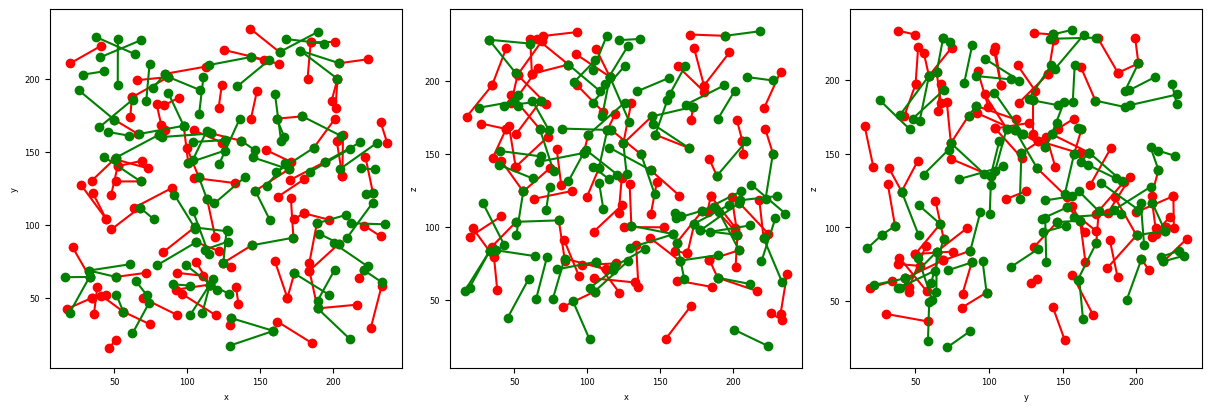

In [11]:
# Show the lost and new contacts at the first time step
fig, ax = plt.subplots(1,3, figsize = (4*3, 4), constrained_layout=True)
PlotContact(Lost[0],color='r',ax=ax, nameaxes=['z','y','x'])
PlotContact(New[0],color='g',ax=ax, nameaxes=['z','y','x'])

## G) Detect T1 events

In [12]:
# Name and directory where we are going to save the T1 events
dir_T1 = 'Q11_T1/'
name_T1 = 'T1'

DetectT1_Batch([dir_Ctc,name_Ctc+'pair_'],
               [dir_LostNewCtc,name_LostCtc],
               [dir_LostNewCtc,name_NewCtc],
               name_T1,
               dir_T1,
               imrange[:-1],
               verbose=False,
               n0=3)

[1, 2, 3, 4, 5, 6, 7, 8, 9]
Path exist: True


100%|██████████| 63/63 [00:00<00:00, 415.16it/s]


In [13]:
# Read the T1
T1_NewLost = ReadT1([dir_T1,name_T1],
                    imrange[0:9], 
                    verbose=True, 
                    n0=3)

Q11_T1/T1001_NewLost.tsv
Q11_T1/T1002_NewLost.tsv
Q11_T1/T1003_NewLost.tsv
Q11_T1/T1004_NewLost.tsv
Q11_T1/T1005_NewLost.tsv
Q11_T1/T1006_NewLost.tsv
Q11_T1/T1007_NewLost.tsv
Q11_T1/T1008_NewLost.tsv
Q11_T1/T1009_NewLost.tsv
Q11_T1/T1001_LostNew.tsv
Q11_T1/T1002_LostNew.tsv
Q11_T1/T1003_LostNew.tsv
Q11_T1/T1004_LostNew.tsv
Q11_T1/T1005_LostNew.tsv
Q11_T1/T1006_LostNew.tsv
Q11_T1/T1007_LostNew.tsv
Q11_T1/T1008_LostNew.tsv
Q11_T1/T1009_LostNew.tsv


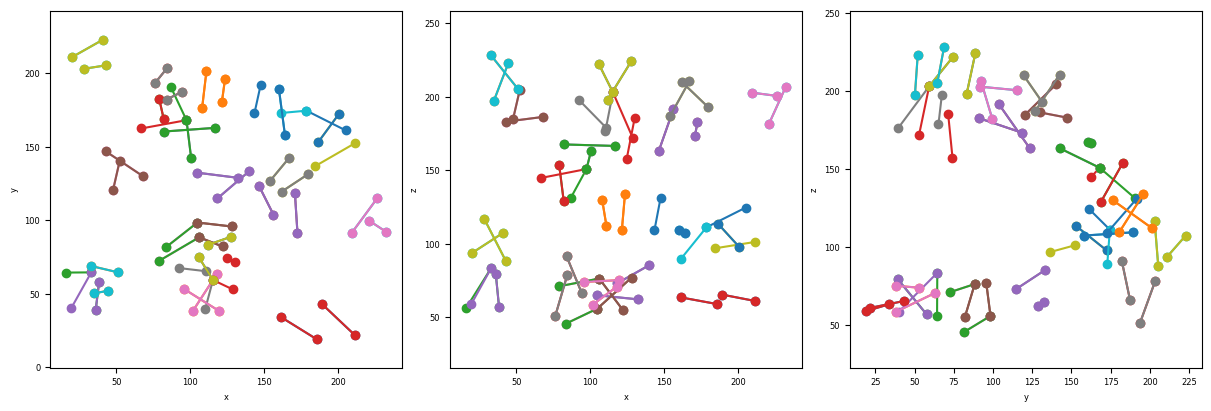

In [14]:
# show the T1 detected between the first and second time-step
timeindex = 0
fig, ax = plt.subplots(1,3, figsize = (4*3, 4), constrained_layout=True)
PlotT1([T1_NewLost[0][timeindex],T1_NewLost[1][timeindex]], ax=ax, color=None, nameaxes=['z','y','x'])

You have now completed this tutorial. I hope it has been helpfull to you. Go back to [FoamQuant - Examples](https://foamquant.readthedocs.io/en/latest/examples.html) for more examples and tutorials.